<a href="https://colab.research.google.com/github/Levelearn/data-analysis/blob/main/reliability_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin

**1. Import Libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from pingouin import cronbach_alpha

**2. Mounting Colab to Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**3. Import Dataset**

In [5]:
file_path = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'
df = pd.read_csv(file_path, encoding="latin-1", sep=";")
df.head()

,Timestamp,Email,Nama,NIM,Angkatan,Happiness_Q1,Happiness_Q2,Happiness_Q3,Happiness_Q4,Happiness_Q5,...,TaskSuccess_Q4,TaskSuccess_Q5,Qualitative_Q1,Qualitative_Q2,Qualitative_Q3,Qualitative_Q4,Feedback,Error,Suggestion,File
0,3/26/2025 11:44:39,gloriapanjaitan3012@gmail.com,Gloria Panjaitan,11S23030,2023,5,4,4,5,5,...,4,5,Leaderboard,Tidak,Tidak,Lebih seru dan menarik,Sudah di upload,Sudah di upload,Menambahkan animasi sederhana,https://drive.google.com/open?id=1UWwnVxfv8Sn8...
1,3/26/2025 11:45:03,andresaragih932@gmail.com,Andre Christian Saragih,11S23026,2023,5,5,5,5,5,...,5,5,Point\n\nKarena pointnya dapat ditukarkan dan ...,Tidak,Tidak,Gamifikasi meningkatkan kualitas belajar saya,Sangat bagus,Sudah di uppload,Sudah baik,https://drive.google.com/open?id=1yJpmGPuwsZ1A...
2,3/26/2025 11:45:24,firenoobgaming@gmail.com,Josua,11S23033,2023,3,3,5,4,3,...,3,3,Progress bar,Tidak,Tidak ada sejauh ini,Sama aja,Di foto,Banyak,Ada di foto,https://drive.google.com/open?id=1-51jAdyASsbI...
3,3/26/2025 11:46:16,josuaasrgh@gmail.com,Josua Saragih,11S23028,2023,5,5,4,4,4,...,3,4,Leaderboard,tidak,tidak ada,"lebih seru, dan jadi berpacu untuk belajar",aplikasi nya bagus untuk memacu mahasiswa untu...,1. tombol back tidak berfungsi dengan baik\n2....,UI nya lebih menarik lagi,NaN
4,3/26/2025 11:47:18,christopasaribu90@gmail.com,Christo Pasaribu,11S23005,2023,5,5,5,4,4,...,4,4,"Point, karena ingin menukar nya dengan hadiah",Tidak,Tidak,Sebelum ada fitur gamifikasi tidak ada niatan ...,NaN,Jumlah soal yang benar tidak sesuai dengan jum...,Menurut saya sudah pass mantapp\n,NaN


**4. Data Pre-Processing**

In [6]:
# Memilih hanya kolom dengan skala Likert (pertanyaan terkait HEART Framework)
likert_columns = df.columns[5:30]  # Mengasumsikan kolom 5-30 berisi skala Likert
df_likert = df[likert_columns].astype(float)

# Menghitung total skor responden
df_likert["Total_Score"] = df_likert.sum(axis=1)

**5. Reliability Test using Crobach's Alpha**

<ipython-input-11-e0f9e886a1df>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Cronbach's Alpha"], y=[alpha_value], palette="Blues")


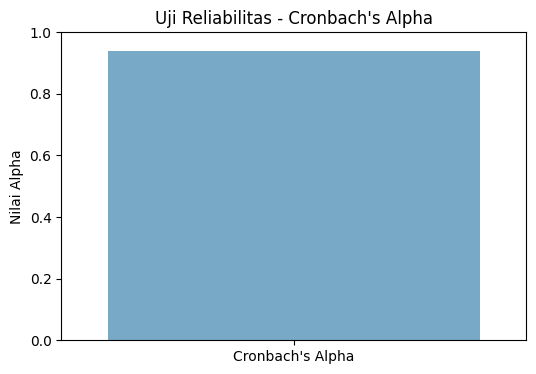

np.float64(0.9379599255599613)

In [11]:
from scipy.stats import ttest_1samp

# Fungsi untuk menghitung Cronbach's Alpha
def cronbach_alpha(df):
    items = df.shape[1]
    variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    alpha = (items / (items - 1)) * (1 - (variances.sum() / total_variance))
    return alpha

# Menghitung Cronbach's Alpha
alpha_value = cronbach_alpha(df_likert.iloc[:, :-1])  # Mengabaikan kolom Total_Score

# Visualisasi reliabilitas
plt.figure(figsize=(6, 4))
sns.barplot(x=["Cronbach's Alpha"], y=[alpha_value], palette="Blues")
plt.ylim(0, 1)
plt.title("Uji Reliabilitas - Cronbach's Alpha")
plt.ylabel("Nilai Alpha")
plt.show()

# Menampilkan hasil
alpha_value
